# Linear Regression

In [10]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
cd /Users/aodubela/Desktop/Linkedin/ExerciseFiles/Data

/Users/aodubela/Desktop/LinkedIn/ExerciseFiles/Data


In [12]:
# load Student Performance Data

student1 = pd.read_csv("student-mat.csv", sep = ';', header = 0)
student2 = pd.read_csv("student-por.csv", sep = ';', header = 0)

In [13]:
# Inspect Data 
student1.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
# view student2 dataset

student2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [15]:
# the tail function shows the last 5 rows of data

student1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [16]:
# explore the end of the student2 dataset
student2.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [17]:
# Combine datasets

students = pd.concat([student1,student2])

In [18]:
# view new dataset


In [19]:
# Convert to DataFrame

student_df = pd.DataFrame(students)

In [20]:
# explore the counts and summary statistics of dataset


In [21]:
# Check for missing data
total = student_df.isnull().sum().sort_values(ascending=False)

In [22]:
 print(list(df.columns))

NameError: name 'df' is not defined

In [23]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

/Users/aodubela/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/aodubela/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/aodubela/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/aodubela/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/aodubela/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.

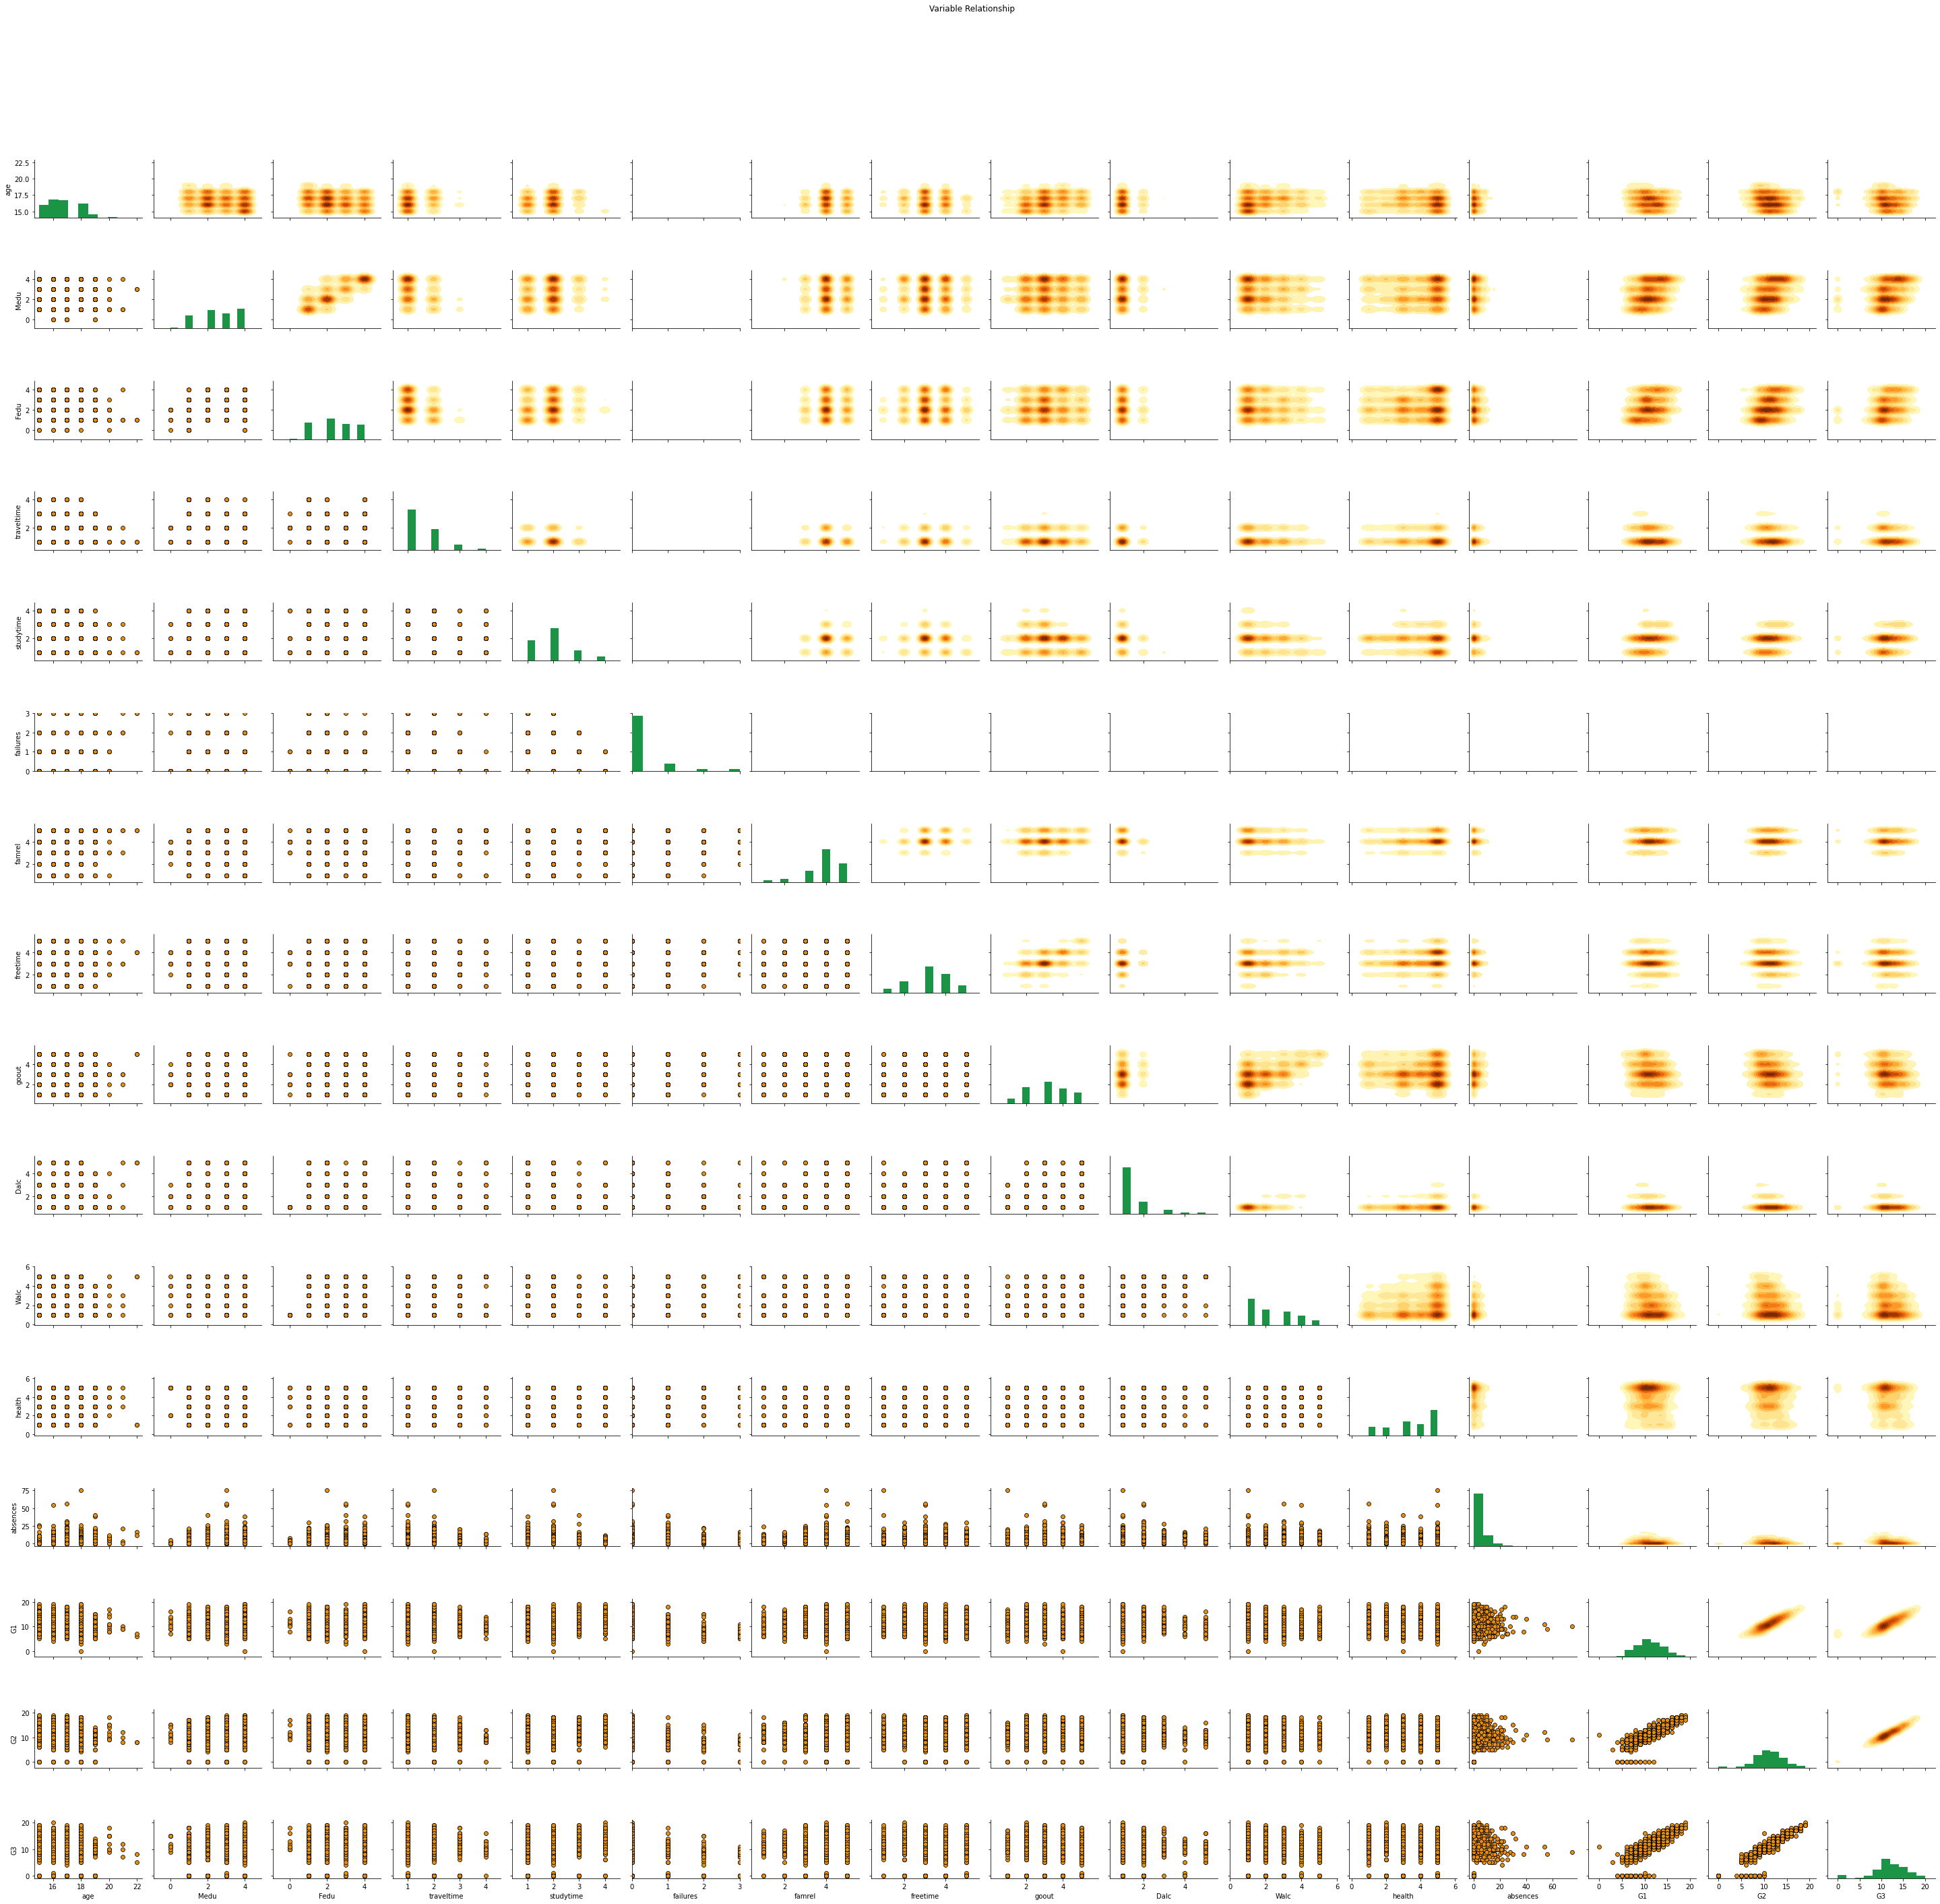

In [24]:
g = sns.PairGrid(student_df)
g = g.map_upper(sns.kdeplot, cmap = 'YlOrBr', shade = True, shade_lowest = False)     #KDE
g = g.map_diag(plt.hist, color = '#1c9446')                                           #Histogram
g = g.map_lower(sns.scatterplot, color='#e68e12', edgecolor = 'k')                    #Scatter 
   
g.fig.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.9)
g.fig.suptitle('Variable Relationship')
plt.show()

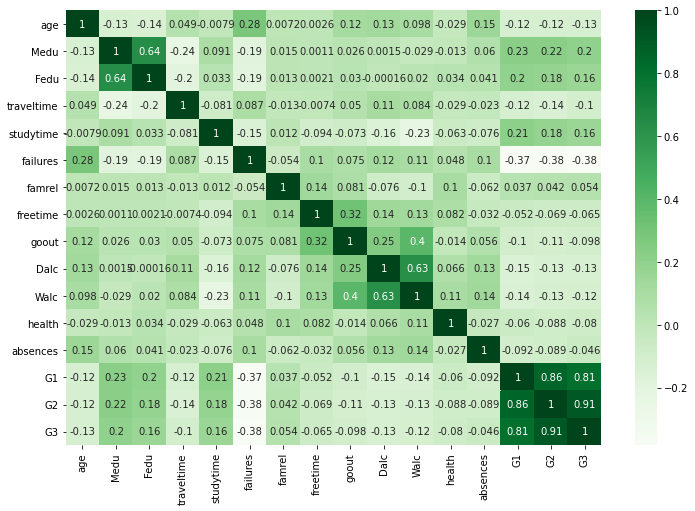

In [25]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(student_df.corr(), cmap='Greens', annot=True)
plt.show()

In [27]:
student_df.corr()[['G3']].sort_values(by='G3', ascending = False)


,G3
G3,1.000000
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
famrel,0.054461
absences,-0.045671
freetime,-0.064890
health,-0.080079


In [ ]:
# Drop protected classes


In [ ]:
g = sns.PairGrid(student_df[['G2','G1','Medu','studytime', 'Fedu']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

In [37]:
# Separate target and feature variables, X for features, y for the target

X = students.iloc[:,:-2].values
y = students.iloc[:,-1].values

In [38]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

TypeError: unhashable type: 'numpy.ndarray'

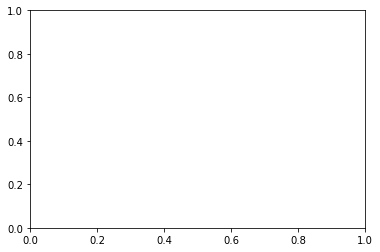

In [41]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

plt.show()

SyntaxError: invalid syntax (<ipython-input-33-dbe32d34fe78>, line 1)

In [29]:
classifier.fit(X_train, y_train)

NameError: name 'classifier' is not defined

In [30]:
print('intercept:', model.intercept_)
intercept: 5.633333333333329
>>> print('slope:', model.coef_)
slope: [0.54]

SyntaxError: invalid syntax (<ipython-input-30-b5e0b31daa5e>, line 3)

In [31]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)


NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# https://www.codespeedy.com/model-evaluation-metrics-in-regression-models-with-python/

print ('Confusion Matrix :', confusion_matrix(y_test, y_pred))
print ('Accuracy Score is', accuracy_score(y_test, y_pred))
print ('Max Error : ', max_error(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))


print("R Squared:", r2_score(y_test, y_pred))
